# <center> NANOGrav Pulsar Signal Simulator</center> #
## <center> IPTA 2017 Meeting: Sevres, France </center> ##
## <center> Jeffrey S. Hazboun, UTRGV </center> ##

<img src="./images/Fresnel.png" style="width: 300px;"/>

### <center> Including: JSH, Michael Lam, Nathan Garver-Daniels, Paul Brooks, Paul Baker, Pete Gentile, Jing Luo, Megan De Cesar, Jim Cordes, Joe Lazio, _Amelia Henkel (REU)_ , _Cassidy Wagner (REU)_ </center> ###

*If I forgot your name, show up to the telecons more often. 

## <center> Why a pulsar signal simulator? </center> ##

1. Definitely not the first ones to think of this...
<img src="./images/wheel.jpg" style="width: 500px;"/>
2. Strength in multiple approaches and platforms.

## Simulator Summary ##

1. Simulate Pulsar Signals (NANOGrav Effort: Since Jan 2017)
    * ISM (IISM) has been the priority.
    * Timing is the next process on the list. (PINT)
    * Optimistic view is for use in a full simulation. (more hands on deck)
2. Teach people (students) about pulsar signals.
    * "Explore Mode"
    * Show students Baseband data!
    * Outreach
3. Many other use ideas:
    * Mock Data Challenge?
    * Testing search pipelines.
    * FRBs.
    * Highly relativistic binary timing models. 
    * Testing Telescope use for pulsars.

 ## Design ##
 1. Designed for __YOU__ to use it!! It's the skeleton for what you need. 
 <img src="./images/centaur-skeleton.jpg" style="width: 300px;"/>
 2. Python Based (Python 3, with backwards compatibility).
     * But really Python 2? Get over it they're just parenthesis.
 3. Git version control. 
     * Code is on GitHub. https://github.com/PsrSigSim
     * Example notebooks on GitHub.
     * Well documented. 
     * Unit tests with Version 1.0 release.
 4. Modular design. 
     * Multiple models for the different processes.
     * Allow for user to add their "tweak" at any point in the simulation.
 5. PSRFITS or Python Array output
 6. Optimized simulation mode
     * Take `.par` or other input files (`.src`).
     * FFTW, (PyCUDA, in the future..)
 7. Easily connects to the NANOGrav API for data
     * IPTA API ? 

<img src="./images/Architecture.pdf" style="width: 700px;" />
<img src="./images/Architecture_Meta.pdf" style="width: 700px;" />

In [1]:
#Import the usual suspects.
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
%matplotlib inline

# Load the Simulator 
# For now, if the simualtor isn't in the current working directory include
# import sys
# sys.path.append('/path/to/simulator/') # where the last directory is the one above VersionZeroPointZero
import sys
sys.path.append('/Users/jeffrey/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/')
import VersionZeroPointZero as PSS
from VersionZeroPointZero.PSS_plot import joy_division_profiles

In [2]:
# Some helpful redefinitions for Matplotlib
rcParams['figure.figsize'] = (6.0,4.0)
rcParams.update({'font.size': 14})
Cmap = cm.afmhot 
Cmap.set_bad(color='k',alpha=1.0) #PSRCHIVE Colormap, care of Michael Lam

In [3]:
# I'll put this little gem into the simulator next later. 
def ProfilePlot(array, step=1, N=10,Title='Profile by Frequency Channel'):
    try:
        array_len = len(N)
        jj = 0
        for ii, jj in enumerate(N):
            plot(array[jj,:]+ii*(step),c='k')
        n=len(N)
    except:
        Freq_channels = len(array[:,0])
        Freq_step = int(Freq_channels//N)
        for ii in range(N):
            plot(array[ii*Freq_step,:]+ii*(step),c='k')
        n=N
    title(Title)
    xlabel('Phase')
    ylabel('Frequency Channel')
    xticks([])
    yticks([])
    xlim(0,len(array[0,:]))
    ylim(0,n*step+0.1)
    show()

# Okay, start paying attention again. 

In [12]:
#The Simple Case
S = PSS.Signal()
P = PSS.Pulsar(S)

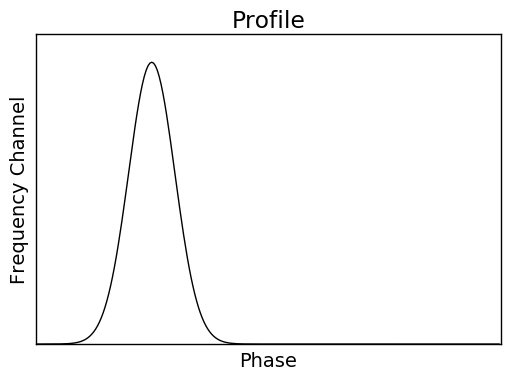

In [13]:
PSS.PSS_plot.joy_division_profiles(P,N=1,Title='Profile')

In [14]:
P.make_pulses() #The commmand that makest the pulses

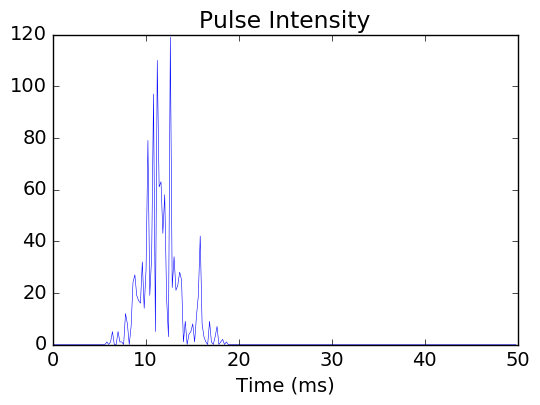

In [15]:
S.pulse_plot() #A shortcut plotting command

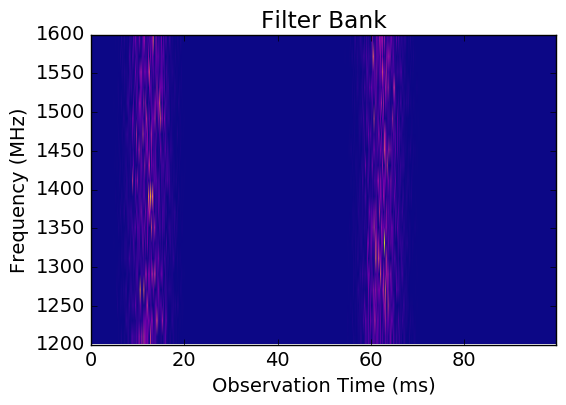

In [16]:
S.filter_bank(N_pulses=2) #Another shortcut plotting command

In [17]:
ism = PSS.ISM(S) #Instantiate an ISM class

In [18]:
ism.disperse() #Command to disperse the signal

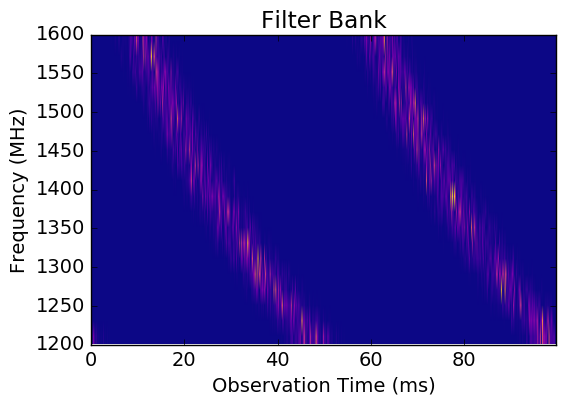

In [19]:
S.filter_bank(N_pulses = 2) #Note the option to show any number of pulses (also in pulse_plot())

In [20]:
del S,P,ism #Get rid of these to save memory

Sets our one hundred thousand time bin array to the GUPPI sample rate. GUPPI Sample rate = 20.48 microseconds

In [5]:
sample_size = 20.48e-3
N_Time_Bins = 100000 #One hundred Thousand
Total_time = round(N_Time_Bins*sample_size)
subband =1.5625 
BW=200
N_freq = BW/subband
print('Total_time (ms)',Total_time)
print('N_freq',N_freq)
print('Number of pulses = ',round(Total_time/8.3))

Total_time (ms) 2048
N_freq 128.0
Number of pulses =  247


In [22]:
S1= PSS.Signal(f0=1400, bw=200, Nf=N_freq, Nt=N_Time_Bins)

In [23]:
P1= PSS.Pulsar(S1,period=8.3)

In [24]:
S1.MetaData.__dict__ #The MetaData subclass of Signal carries all of the info about the simulation.

{'Nf': 128,
 'Nt': 100000,
 'SignalType': 'intensity',
 'TotTime': 200,
 'bw': 200,
 'data_type': 'uint8',
 'f0': 1400,
 'gamma_draw_max': 255,
 'mode': 'explore'}

In [25]:
#Arrays that define gaussian components of average profiles
peak = np.random.randn(S1.Nf*3)*0.03 + 0.2
width = abs(np.random.randn(S1.Nf*3)*0.002 +0.012)
amp = np.random.randn(S1.Nf*3)**2
peak.resize(S1.Nf,3)
width.resize(S1.Nf,3)
amp.resize(S1.Nf,3)
#peak # Uncomment this line to see the shape of the array

In [29]:
P1.gauss_template(peak=peak,width=width,amp=amp) 

The `gauss_template()` command recognizes three different array shapes and assumes what to do, depending on which array shape is given. See documentation for details, `help(P1.gauss_template)`. These are a set of __randomly chosen__ gaussian components. One could put in an array that showed pulse evolution (in frequency) for a given pulsar, or put in the same gaussian in all frequency channels. 

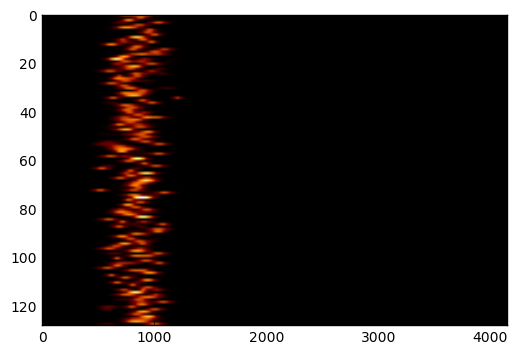

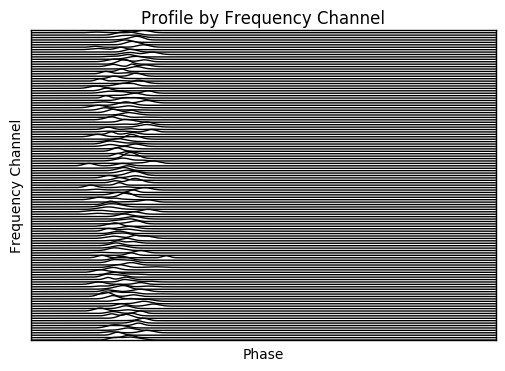

In [30]:
imshow(P1.profile,aspect='auto',cmap=Cmap)
show()
joy_division_profiles(P1,1,N=S1.Nf)

## <center> Average Profile </center>

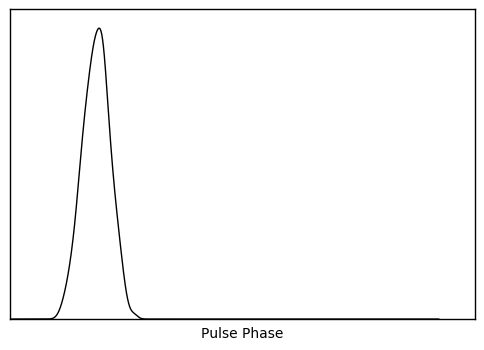

In [31]:
plot(np.sum(P1.profile,axis=0),c='k')
xticks([])
yticks([])
xlabel('Pulse Phase')
show()

In [32]:
P1.make_pulses()

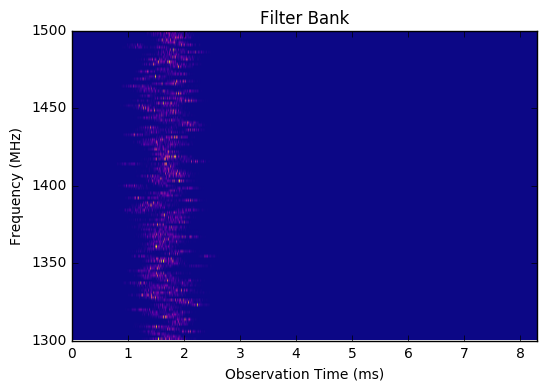

In [33]:
S1.filter_bank()

In [34]:
S1.MetaData.__dict__.keys()

dict_keys(['gamma_draw_norm', 'TotTime', 'f0', 'signal_pulsed', 'peak', 'nBins_per_period', 'width', 'SignalType', 'data_type', 'gamma_draw_max', 'Nf', 'Nt', 'mode', 'amplitude', 'profile', 'Profile', 'gamma_shape', 'bw', 'pulsar_period', 'gamma_scale'])

In [35]:
del S1, P1

In [54]:
S2=PSS.Signal(f0=400,bw=200,Nf=N_freq,Nt=N_Time_Bins,mode='simulate')
P2=PSS.Pulsar(S2,period=8.3)

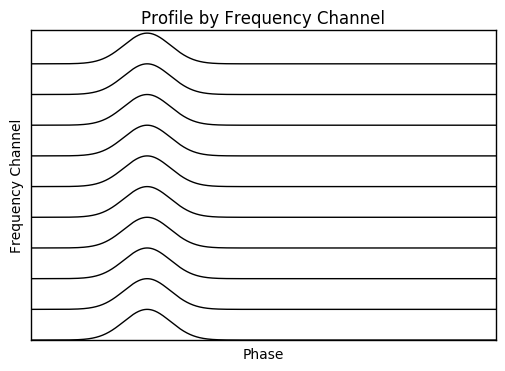

In [55]:
joy_division_profiles(P2)

#### Convolve our Filterbank Signal with a top hat to mimic dispersion broadening  (Cassidy Wagner)

In [56]:
ISM2 = PSS.ISM(S2,DM=2)

In [57]:
ISM2.to_DM_Broaden = True
ISM2.finalize_ism()

In [58]:
Sim2 = PSS.Simulation(S2,P2,ISM2)

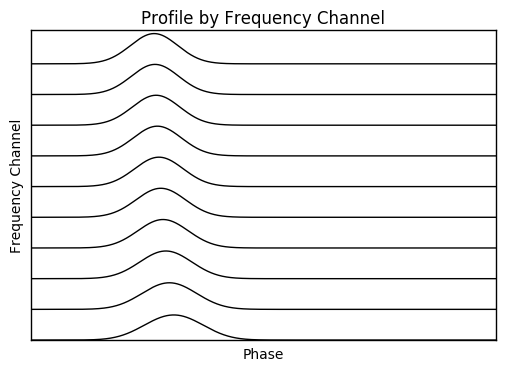

In [59]:
joy_division_profiles(P2)

In [60]:
del S2,P2,ISM2,Sim2

In [70]:
S2b=PSS.Signal(f0=400,bw=200,Nf=N_freq,Nt=N_Time_Bins,mode='simulate')
P2b=PSS.Pulsar(S2b,period=8.3)

In [71]:
ISM2b = PSS.ISM(S2b,DM=2)
ISM2b.tau_scatter = 0.4
ISM2b.to_Scatter_Broaden_exp = True
ISM2b.finalize_ism()
Sim2b = PSS.Simulation(S2b,P2b,ISM2b)

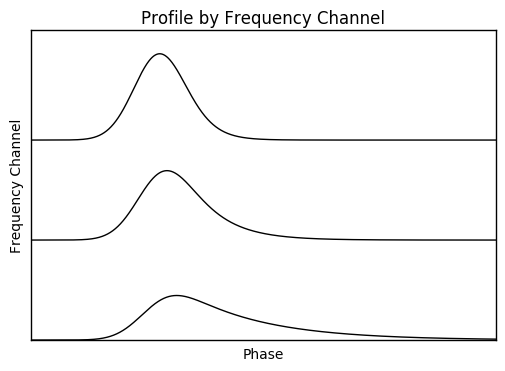

In [72]:
joy_division_profiles(P2b,N=3)

In [73]:
del S2b,P2b,ISM2b,Sim2b

In [119]:
S3=PSS.Signal(f0=2000,bw=200,Nt=N_Time_Bins,SignalType='voltage')
P3=PSS.Pulsar(S3,period=8.3)
P3.gauss_template([0.15,0.22],[.01,.02],[.01,.02])

In [120]:
P3.make_pulses()

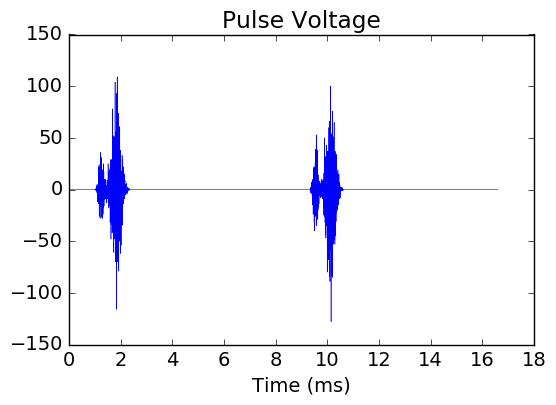

In [121]:
S3.pulse_plot(N_pulses=2)

In [122]:
ISM3 = PSS.ISM(S3,DM=2)

In [123]:
ISM3.disperse()

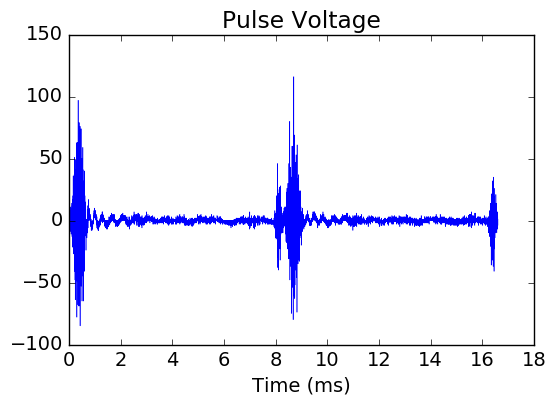

In [124]:
S3.pulse_plot(N_pulses=2)

In [125]:
del S3,P3,ISM3

In [126]:
S4 = PSS.Signal(f0=324, bw=6, Nf=250, Nt=12000,\
                TotTime = 1200, SignalType='intensity', data_type='int8')
P4 = PSS.Pulsar(S4, period=20)
dims = 200
DM = 22
Range = [0, S4.Nf//2, S4.Nf-1]
Phase_Screen = PSS.phase_screen(S4, scint_param_model='Bhat',DM=DM, Nx = 4*dims, Ny = dims, Number_r_F=1/128.)

Central Frequency decorrelation Bandwidth =  0.042  MHz


In [127]:
Gain1 = PSS.images(Phase_Screen,S4,mode='explore')

## References

Cordes et al.(1986); Coles et al. (1987); Foster & Cordes (1990); Hu et al. (1991) and Coles et al. (2010)

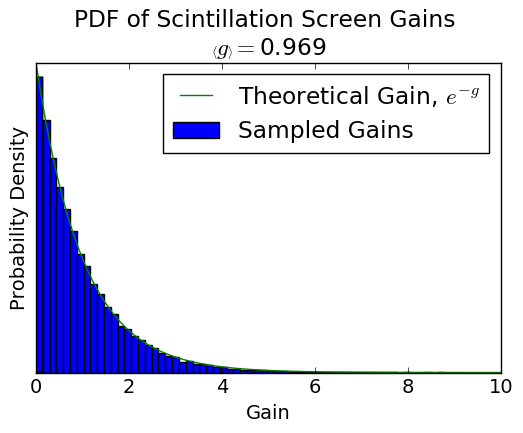

In [128]:
Gain1.gain_pdf()

# Scattering Realization

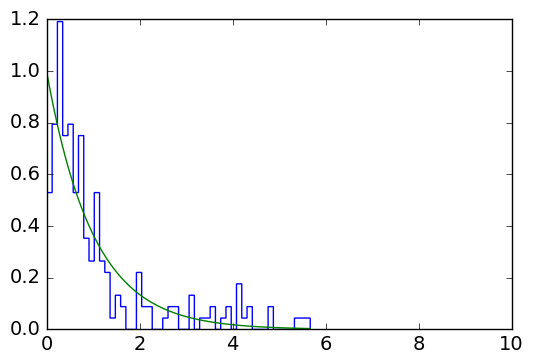

In [129]:
finite_sample = Gain1.gain[3,:200,100]
t=np.linspace(0,finite_sample.max(),100)
hist(finite_sample,bins=50,histtype='step',normed=True)
plot(t,np.exp(-t))
xlim(0,10)
show()

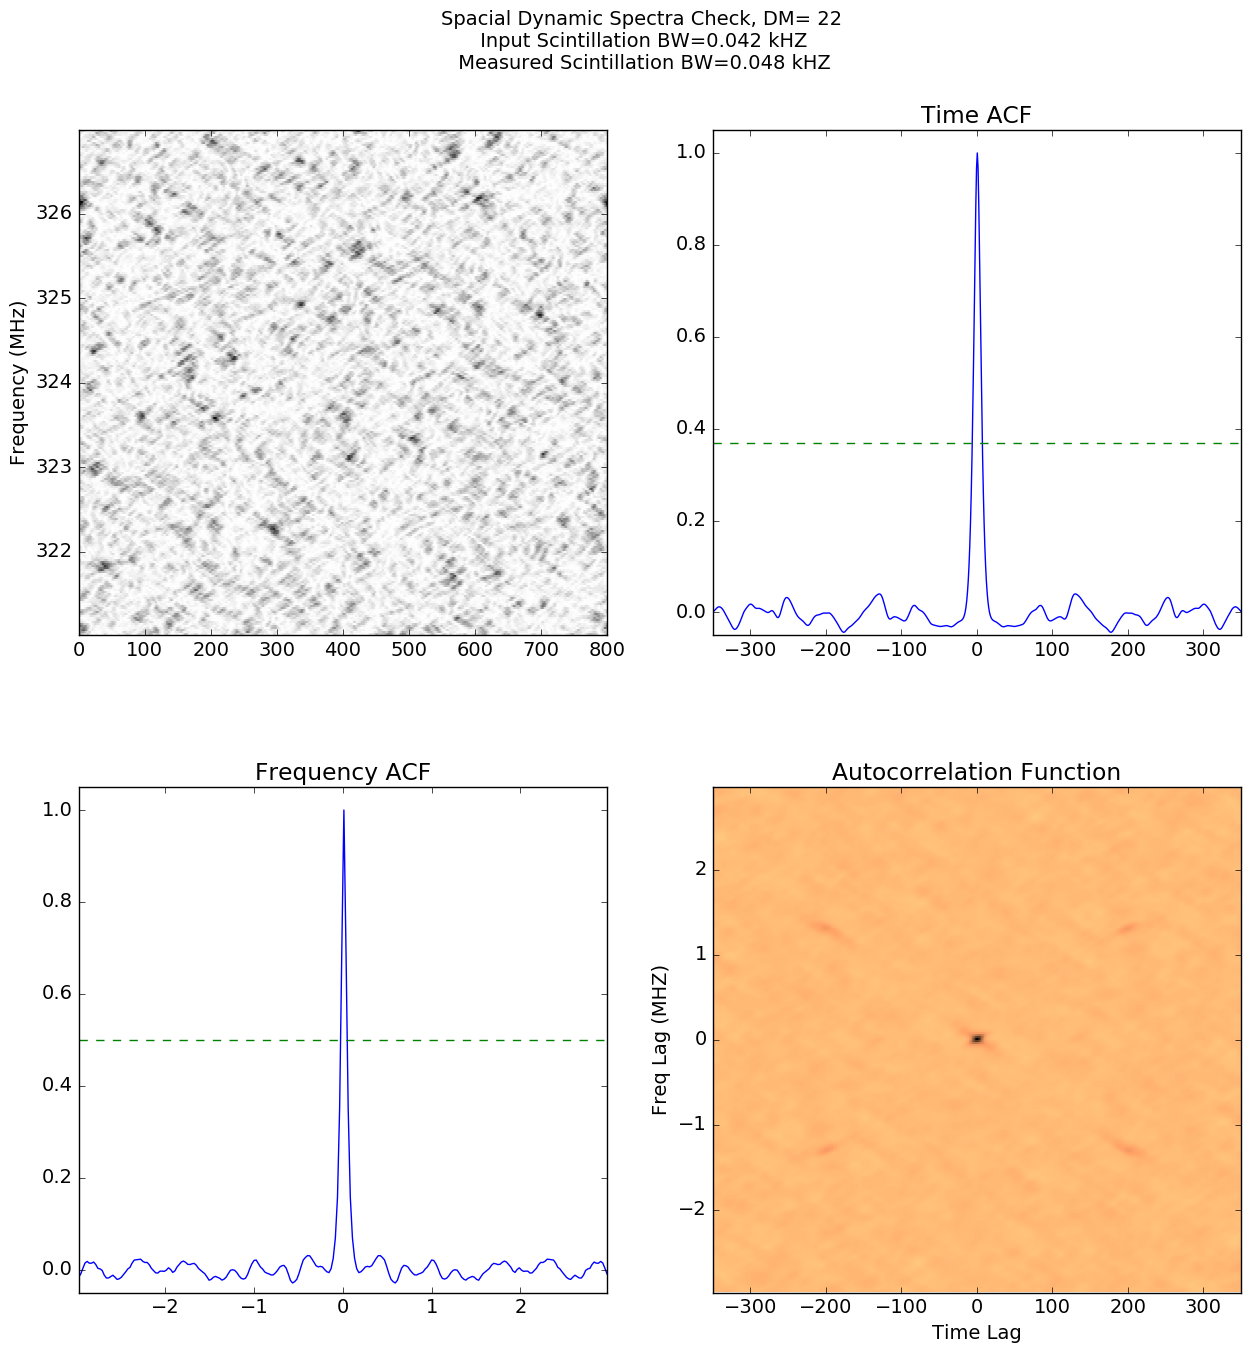

In [130]:
Gain1.dynamic_spectrum(S4)

### Note: This is not actually a dynamic spectrum , but the intensity screen one gets from the kernel diffraction integral and its autocorrelation. It is meant as a visual check on the scintillation screen simulation.

In [131]:
del S4,P4, Phase_Screen, Gain1

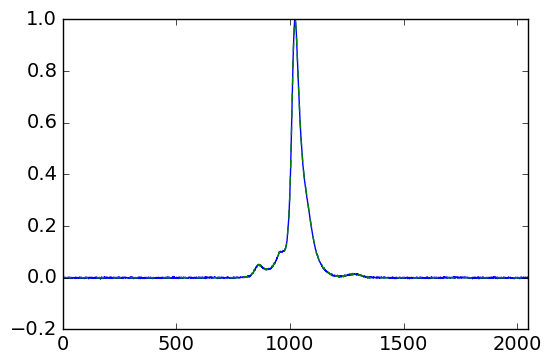

In [67]:
J1713_profile = np.load('J1713+0747_pulses.npy')[20,:] #Load in atemplate for J1713+0747
J1713_profile /= J1713_profile.max() #Normalize the template
J1713_cleaned = np.append(np.append(np.zeros(775),J1713_profile[775:1350]),np.zeros(2048-1350))
#Above we clean the off pulse noise for simulation purposes.
plot(J1713_profile)
plot(J1713_cleaned,'--')
xlim(0,2048)
show()

In [6]:
S5= PSS.Signal(f0=820,bw=200,Nf=len(J1713_profiles[:,0]),Nt=N_Time_Bins,TotTime=Total_time,mode='simulate')
P5= PSS.Pulsar(S5,period=(1/218.8)*1e3)

In [35]:
P5.user_template(J1713_cleaned)

User supplied template has been downsampled.
Input array length=  2048 . Pulse template length=  223 .


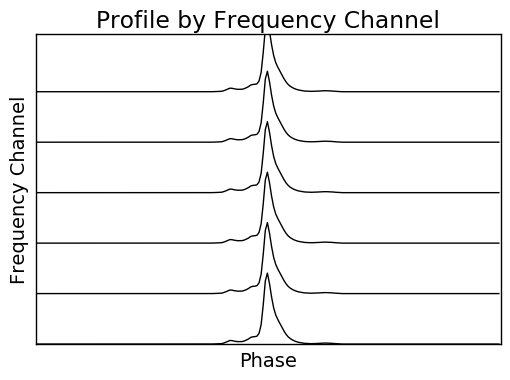

In [38]:
joy_division_profiles(P5,step=0.7, N=[20,45,70,90,110,111])

In [40]:
ISM5 = PSS.ISM(S5)
ISM5.DM = 15.990354 # From J1713+0747 .par file. 
ISM5.finalize_ism()

In [52]:
Scint5 = PSS.scintillate(S5,to_use_NG_pulsar=True,\
                         pulsar='J1713+0747',telescope='GBT',freq_band=820)
#We can enter the name for a NANOGrav pulsar and get its scintillation parameters

Central Frequency decorrelation Bandwidth =  1.48  MHz


In [64]:
Scint6 = PSS.scintillate(S5,scint_timescale=0.1,scint_bw=1.48)
#The scint parameters of J1713 aren't that interesting on a short timescale so I've set different ones. 

Central Frequency decorrelation Bandwidth =  1.48  MHz


In [54]:
Simul5 = PSS.Simulation(S5,P5,ISM5,Scint6)

In [55]:
Sim1a = Simul5.simulate()

A scintillated set of profiles is used to simulate the scintillation, where the gains by freuqnecy are given from a thin screen simulation. 

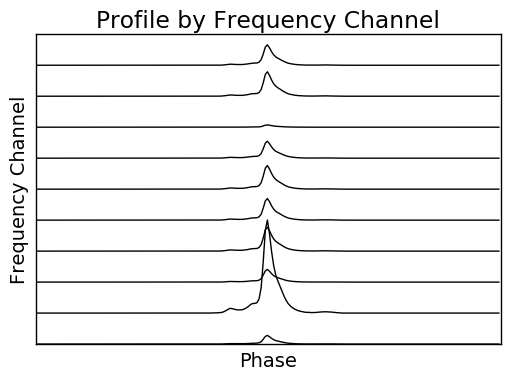

In [59]:
joy_division_profiles(P5,step=15) 

### The entire signal has been scintillated, however a dynamic spectrum script has not yet been completed for the PSS.

## Remember, this simulator is meant to be flexible... FRBs !!

<img src="./images/dispersed_burst.png" style="width: 500px;" />

## Looking Forward (In no particular order)
1. Visualization (`Bokeh`, thanks to Aditya)
2. More advanced scattering simulations
3. Timing model
4. Command Line access
5. Python Class Factories
6. More Amplitude Modulated Noise Distribution Choices
7. Richard Prestage's (GBT)  phased array simulation

# <center> Please Join Us! </center>
## <center> (IPTA Simulator ?) </center>

Note to beat a dead horse, but...<img src="./images/Horse_and_Man.jpg" style="width: 220px;" />

 ### The simulator development is still plastic. Many of you have strong opinions about pulsar software. I would really like to here what you have to say _before_ the simulator has been fully... _fleshed out_.

In [ ]:
#Unless you want to tell me to code it in c...

1. Submit an enhancement request on our GitHub page.
2. Send me an email with any questions, advice, dreams of a perfect simulator.
3. Please consider sharing any pulsar related python scripts that you might want others to use, or that you might want implemented in the

## <center> Version 1.0 release in Fall 2017 !!</center>